**IMPORT LIBARY**


**NAMA : FEBRIANI DEWI ALVIAH**

**NPM : 2310506010**

**AKSES GOOGLE DRIVE**

In [33]:
# Import necessary libraries
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score # Import cross_val_score here
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns


In [12]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**MEMBACA DATASET**

In [13]:
# Step 1: Melihat 5 baris pertama dari DataFrame
file_path = '/content/drive/MyDrive/TugasAkhir/U.S._Chronic_Disease_Indicators.csv'  # Replace with actual file path
data = pd.read_csv(file_path)
data.head()


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
1,2019,2019,ID,Idaho,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
2,2019,2019,IN,Indiana,YRBSS,Sleep,Short sleep duration among high school students,NaN,%,Crude Prevalence,...,SLEP,SLP02,NaN,CRDPREV,GRADE,GRD12,NaN,NaN,NaN,NaN
3,2019,2019,IA,Iowa,NVSS,Asthma,"Asthma mortality among all people, underlying ...",NaN,Number,Number,...,AST,AST01,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2019,2019,IA,Iowa,BRFSS,Asthma,Current asthma among adults,NaN,%,Crude Prevalence,...,AST,AST02,NaN,CRDPREV,AGE,AGE1844,NaN,NaN,NaN,NaN


In [14]:
#ringkasan informasi tentang sebuah DataFrame
file_path = '/content/drive/MyDrive/TugasAkhir/U.S._Chronic_Disease_Indicators.csv'  # Replace with actual file path
data = pd.read_csv(file_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309215 entries, 0 to 309214
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  309215 non-null  int64  
 1   YearEnd                    309215 non-null  int64  
 2   LocationAbbr               309215 non-null  object 
 3   LocationDesc               309215 non-null  object 
 4   DataSource                 309215 non-null  object 
 5   Topic                      309215 non-null  object 
 6   Question                   309215 non-null  object 
 7   Response                   0 non-null       float64
 8   DataValueUnit              309215 non-null  object 
 9   DataValueType              309215 non-null  object 
 10  DataValue                  209196 non-null  float64
 11  DataValueAlt               209196 non-null  float64
 12  DataValueFootnoteSymbol    101716 non-null  object 
 13  DataValueFootnote          10

In [15]:
# Mengcek Nilai NaN Pada DataFrame
data.isna().sum()

,0
YearStart,0
YearEnd,0
LocationAbbr,0
LocationDesc,0
DataSource,0
Topic,0
Question,0
Response,309215
DataValueUnit,0
DataValueType,0


In [16]:
# Menghapus kolom dengan semua yang memiliki value null
data_cleaned = data.dropna(axis=1, how='all')
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309215 entries, 0 to 309214
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  309215 non-null  int64  
 1   YearEnd                    309215 non-null  int64  
 2   LocationAbbr               309215 non-null  object 
 3   LocationDesc               309215 non-null  object 
 4   DataSource                 309215 non-null  object 
 5   Topic                      309215 non-null  object 
 6   Question                   309215 non-null  object 
 7   DataValueUnit              309215 non-null  object 
 8   DataValueType              309215 non-null  object 
 9   DataValue                  209196 non-null  float64
 10  DataValueAlt               209196 non-null  float64
 11  DataValueFootnoteSymbol    101716 non-null  object 
 12  DataValueFootnote          101716 non-null  object 
 13  LowConfidenceLimit         18

In [17]:
# Hapus baris yang memiliki nilai penting yang hilang
data_cleaned = data_cleaned.dropna(subset=['DataValue'])
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209196 entries, 0 to 309214
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  209196 non-null  int64  
 1   YearEnd                    209196 non-null  int64  
 2   LocationAbbr               209196 non-null  object 
 3   LocationDesc               209196 non-null  object 
 4   DataSource                 209196 non-null  object 
 5   Topic                      209196 non-null  object 
 6   Question                   209196 non-null  object 
 7   DataValueUnit              209196 non-null  object 
 8   DataValueType              209196 non-null  object 
 9   DataValue                  209196 non-null  float64
 10  DataValueAlt               209196 non-null  float64
 11  DataValueFootnoteSymbol    1697 non-null    object 
 12  DataValueFootnote          1697 non-null    object 
 13  LowConfidenceLimit         188885 

In [18]:
# Step 4: Memilih kolom untuk data yang dianalisis
columns_of_interest = [
    'YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc',
    'Topic', 'Question', 'DataValue', 'DataValueType', 'Geolocation'
]
data_prepared = data_cleaned[columns_of_interest]

In [9]:
# Step 5: Handle missing values in 'Geolocation' (optional)
data_prepared['Geolocation'] = data_prepared['Geolocation'].fillna('Unknown')

<ipython-input-9-a535d92ff3da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prepared['Geolocation'] = data_prepared['Geolocation'].fillna('Unknown')


In [19]:
# Step 6: Reset index for clean data
data_prepared = data_prepared.reset_index(drop=True)

In [20]:
# Step 7: Display a summary of the prepared data
print("Dataset Information After Preparation:")
print(data_prepared.info())
print("\nSample Data:")
print(data_prepared.head())

Dataset Information After Preparation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209196 entries, 0 to 209195
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   YearStart      209196 non-null  int64  
 1   YearEnd        209196 non-null  int64  
 2   LocationAbbr   209196 non-null  object 
 3   LocationDesc   209196 non-null  object 
 4   Topic          209196 non-null  object 
 5   Question       209196 non-null  object 
 6   DataValue      209196 non-null  float64
 7   DataValueType  209196 non-null  object 
 8   Geolocation    204130 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 14.4+ MB
None

Sample Data:
   YearStart  YearEnd LocationAbbr LocationDesc     Topic  \
0       2019     2019           AR     Arkansas  Diabetes   
1       2019     2019           ID        Idaho  Diabetes   
2       2019     2019           IA         Iowa    Asthma   
3       2019     2019         

In [21]:
# Step 8: Save the prepared data to a new CSV file (optional)
data_prepared.to_csv('Prepared_Chronic_Disease_Indicators.csv', index=False)

**MODELING DATA DENGAN MENGUNAKAN RANDOM CLASSIFIER**

In [22]:
# 2. Pilih fitur dan target
selected_features = ['YearStart', 'YearEnd', 'DataValue']
target_column = 'Topic'

In [23]:
# Hilangkan baris kosong pada kolom penting
data = data.dropna(subset=selected_features + [target_column])

In [24]:
# Fitur (X) dan Target (y)
X = data[selected_features]  # Fitur
y = data[target_column]      # Target

In [25]:
# Encode target jika berupa kategori
y = pd.factorize(y)[0]  # Ubah kategori menjadi angka

In [26]:
# 3. Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# 4. Oversampling menggunakan SMOTE untuk mengatasi ketidakseimbangan
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


In [29]:
# 5. Cross-validation dengan StratifiedKFold
from sklearn.model_selection import StratifiedKFold # Import the StratifiedKFold class
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [30]:
# Model Random Forest
model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=15, min_samples_split=10)

In [34]:
# Evaluasi dengan cross-validation
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=cv, scoring='accuracy')


In [35]:
# Output hasil cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.44409071 0.44332576 0.44554689 0.44554689 0.44634561]
Mean Accuracy: 0.44497117339616493


In [36]:
# 6. Evaluasi lebih lanjut pada subset data test
# Split data untuk evaluasi akhir
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
# Evaluasi akurasi dan laporan klasifikasi
print("\nAccuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy on Test Set: 0.4459618571932114

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.09      0.15      6992
           1       0.30      0.60      0.40      7101
           2       0.34      0.29      0.31      7010
           3       0.22      0.26      0.24      7011
           4       0.33      0.25      0.29      6932
           5       0.22      0.24      0.23      7075
           6       0.22      0.14      0.17      6866
           7       0.28      0.55      0.37      6963
           8       0.46      0.76      0.57      7072
           9       0.26      0.33      0.29      6950
          10       0.58      0.58      0.58      6998
          11       0.19      0.10      0.13      7156
          12       0.99      0.85      0.91      6941
          13       0.30      0.12      0.17      6917
          14       0.40      0.21      0.28      7013
          15       1.00      1.00      1.00      7066
          16  

In [38]:
# 8. Tampilkan prediksi
predicted_results = pd.DataFrame({
    'YearStart': X_test[:, 0],  # Accessing columns by index
    'YearEnd': X_test[:, 1],    # Accessing columns by index
    'DataValue': X_test[:, 2],  # Accessing columns by index
    'Predicted_Topic': y_pred
})
print("\nPredicted Results:")
print(predicted_results)


Predicted Results:
        YearStart   YearEnd  DataValue  Predicted_Topic
0        0.646480  1.616333  -0.042038               15
1       -0.608285 -1.192844  -0.037915                8
2        1.273863  1.616333  -0.041192                7
3        0.646480  0.679940  -0.040417                9
4        1.273863  1.616333  -0.040835                8
...           ...       ...        ...              ...
133336   0.019098 -0.256452  -0.040915                8
133337  -0.608285 -1.192844  -0.040740                5
133338  -0.608285 -1.192844  -0.041495               11
133339  -0.608285 -1.192844  -0.037847               16
133340  -0.608285 -1.192844  -0.028127               17

[133341 rows x 4 columns]


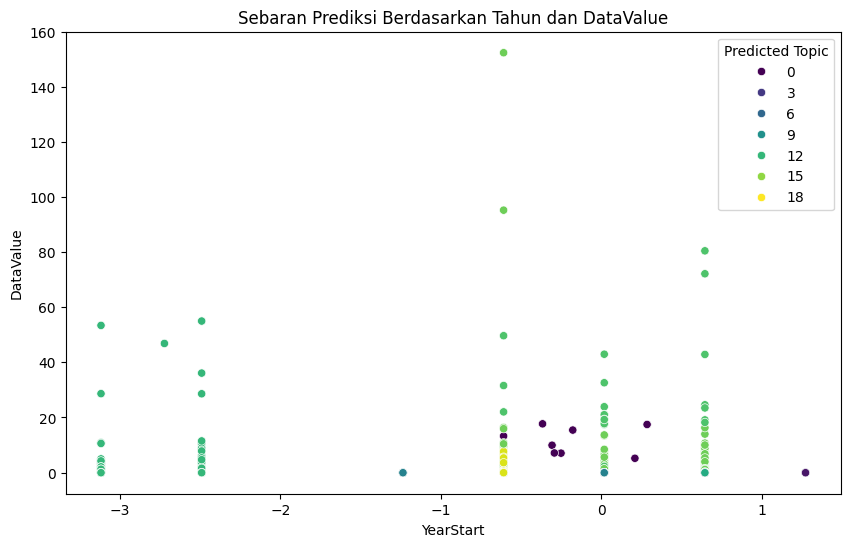

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat DataFrame Prediksi
predicted_results = pd.DataFrame({
    'YearStart': X_test[:, 0],  # Mengakses kolom berdasarkan index
    'YearEnd': X_test[:, 1],    # Mengakses kolom berdasarkan index
    'DataValue': X_test[:, 2],  # Mengakses kolom berdasarkan index
    'Predicted_Topic': y_pred
})

# Visualisasi 1: Scatter Plot Sebaran Prediksi per Tahun
plt.figure(figsize=(10, 6))
sns.scatterplot(data=predicted_results, x='YearStart', y='DataValue', hue='Predicted_Topic', palette='viridis')
plt.title('Sebaran Prediksi Berdasarkan Tahun dan DataValue')
plt.xlabel('YearStart')
plt.ylabel('DataValue')
plt.legend(title='Predicted Topic')
plt.show()



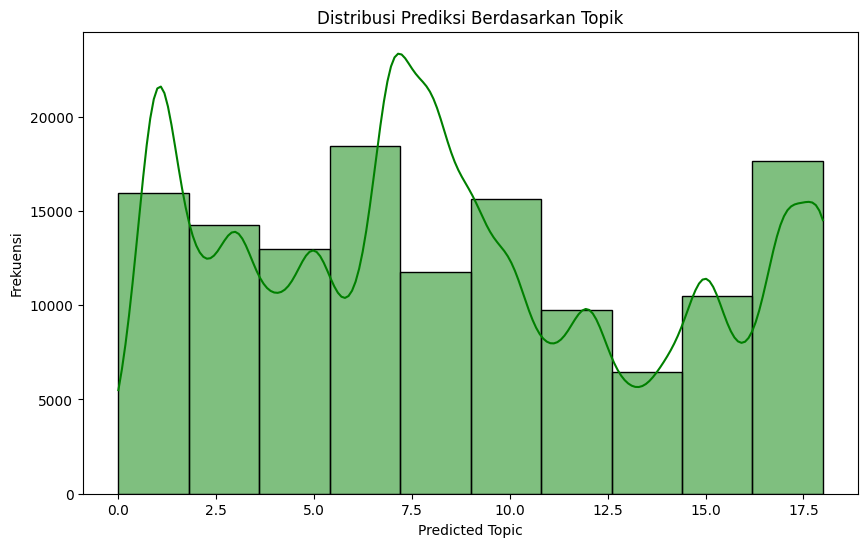

In [42]:
# Visualisasi 3: Histogram Distribusi Prediksi per Topik
plt.figure(figsize=(10, 6))
sns.histplot(data=predicted_results, x='Predicted_Topic', bins=10, kde=True, color='green')
plt.title('Distribusi Prediksi Berdasarkan Topik')
plt.xlabel('Predicted Topic')
plt.ylabel('Frekuensi')
plt.show()

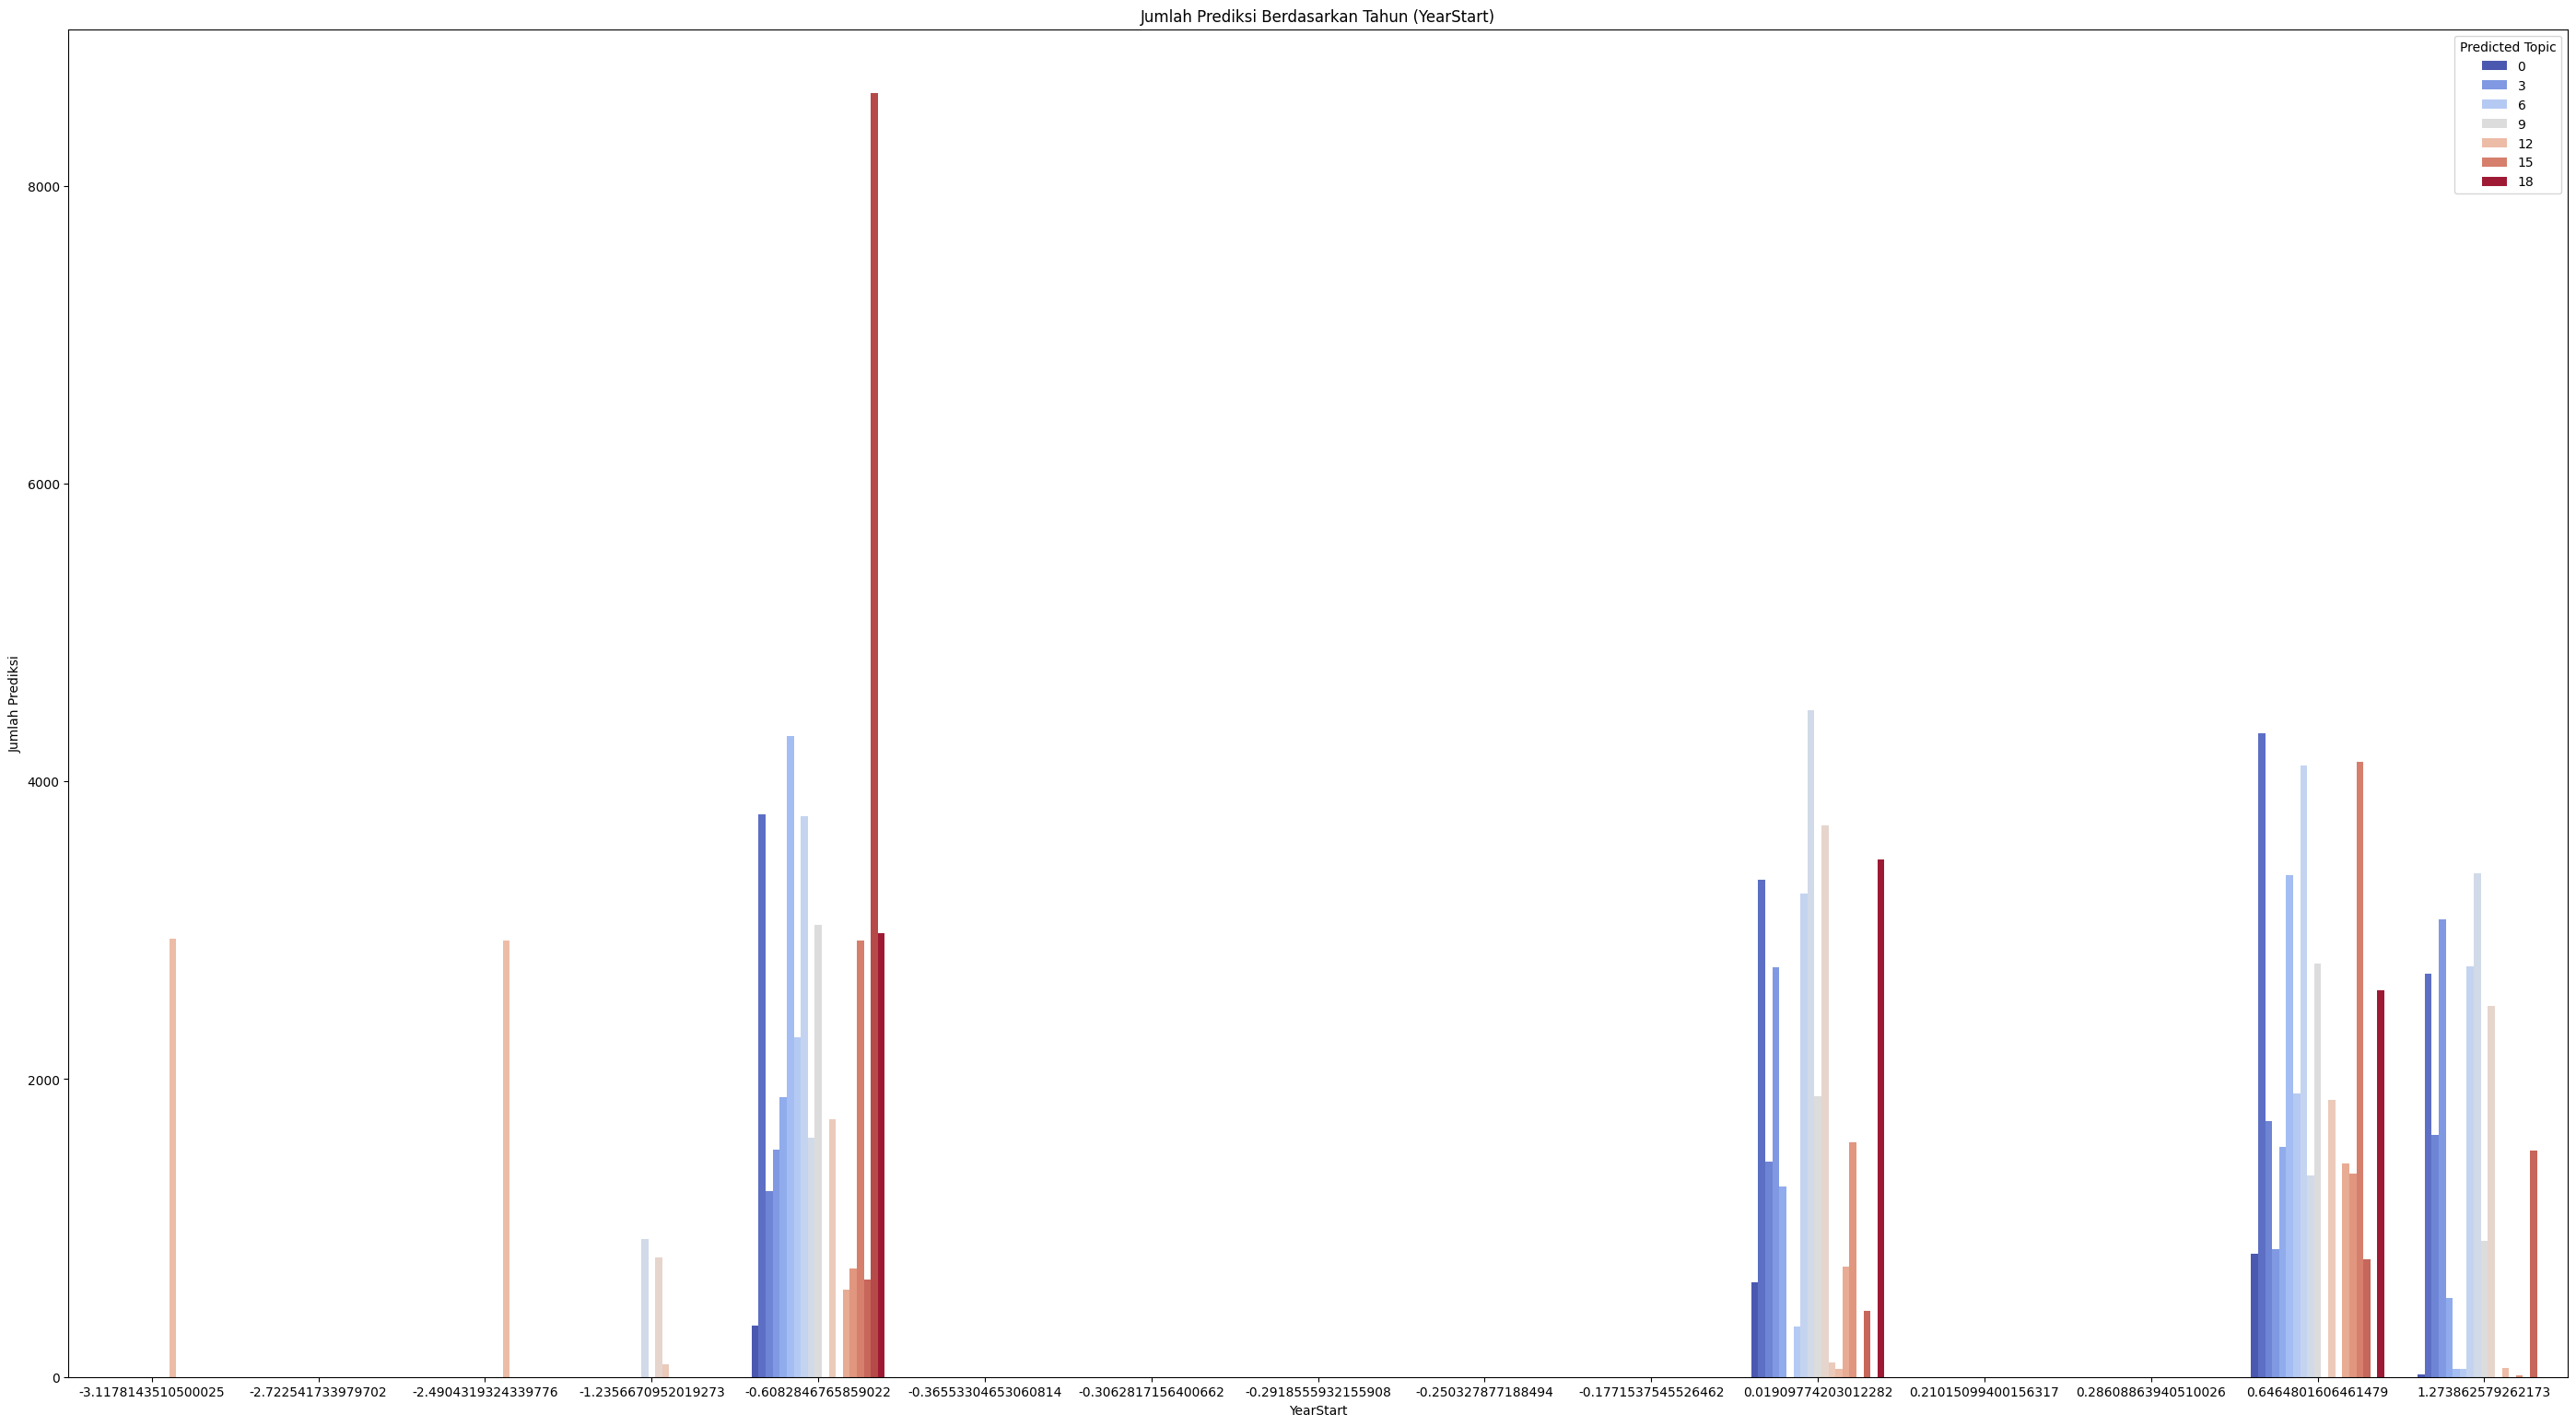

In [45]:
# Visualisasi 2: Barplot Jumlah Prediksi Berdasarkan Tahun
plt.figure(figsize=(35, 19))
sns.countplot(data=predicted_results, x='YearStart', hue='Predicted_Topic', palette='coolwarm')
plt.title('Jumlah Prediksi Berdasarkan Tahun (YearStart)')
plt.xlabel('YearStart')
plt.ylabel('Jumlah Prediksi')
plt.legend(title='Predicted Topic')
plt.show()
